# ¿Cómo elegir un juego?

Trabajas para la tienda online Ice que vende videojuegos por todo el mundo. Las reseñas de usuarios y expertos, los géneros, las plataformas (por ejemplo, Xbox o PlayStation) y los datos históricos sobre las ventas de juegos están disponibles en fuentes abiertas. 

Tienes que identificar patrones que determinen si un juego tiene éxito o no. Esto te permitirá detectar proyectos prometedores y planificar campañas publicitarias.


***DICCIONARIO DE DATOS*** 

`Name` : Nombre

`Platform` : Plataforma

`Year_of_Release` : Año de lanzamiento

`Genre` : Género

`NA_sales` : ventas en Norteamérica en millones de dólares estadounidenses

`EU_sales` : ventas en Europa en millones de dólares estadounidenses

`JP_sales` : ventas en Japón en millones de dólares estadounidenses 

`Other_sales` : ventas en otros países en millones de dólares estadounidenses 

`Critic_Score` : máximo de 100

`User_Score` : máximo de 10

`Clasificación` : ESRB

## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats as st
from matplotlib import pyplot as plt

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
try:
    games = pd.read_csv('/datasets/games.csv')
except:
    games = pd.read_csv(r'..\datasets\games.csv')

# Preparar los datos


In [3]:
#Se muestra las primeras 5 filas

games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
#Informacion sobre las columnas y tipo de datos

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Enriquecer datos

In [5]:
#Se verifica si hay duplicados

games.duplicated().sum()

0

In [6]:
#Volvemos a minusculas los nombres de las columnas

games.columns=games.columns.str.lower()

In [7]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Tratamiento de valores ausentes

### Columna 'year_of_release'

In [8]:
#En la columna 'year_of_release' se extrae los valores únicos

games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Se mantendrá los valores en *float* en la columna **year_of_release** debido a que su cambio a *int* no afecta en el proceso futuro de análisis.

### Columna 'user_score'

In [9]:
#En la columna 'user_score' se extrae los valores únicos

games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [10]:
#Se convierte el 'tbd' por valores ausentes

games['user_score'] = games['user_score'].replace(['tbd'], [np.nan])

In [11]:
#Se pasa a tipo float la columna 'user_score'

games['user_score'] = pd.to_numeric(games['user_score'], errors = 'coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.4+ MB


Se decidió reemplazar los valores *tbd* de la columna **user_score** por valores Nan, esto debido a que es posible que aún no haya sido evaluado el videojuego al momento de extraer los datos. Y no podemos reemplazar por la media o mediana en su mayoria la opinión de un usuario al ser esta también subjetiva.

### Columna 'rating'

In [12]:
#En la columna 'rating' se extrae los valores únicos

games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Muestra las clasificaciones para las edades ideales en las que se deberia jugar el videojuego, lo datos ausentes pueden implicar que aun se encontraba en estudios o en proceso de clasificación cuando se extrajeron los datos.

# Analizar los datos

In [13]:
#Se crea columna con la suma total de ventas de videojuego 

games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


## Cantidad de juegos por año

In [14]:
#Cantidad de juegos lanzados por año

games.groupby('year_of_release').size()

year_of_release
1980.0       9
1981.0      46
1982.0      36
1983.0      17
1984.0      14
1985.0      14
1986.0      21
1987.0      16
1988.0      15
1989.0      17
1990.0      16
1991.0      41
1992.0      43
1993.0      62
1994.0     121
1995.0     219
1996.0     263
1997.0     289
1998.0     379
1999.0     338
2000.0     350
2001.0     482
2002.0     829
2003.0     775
2004.0     762
2005.0     939
2006.0    1006
2007.0    1197
2008.0    1427
2009.0    1426
2010.0    1255
2011.0    1136
2012.0     653
2013.0     544
2014.0     581
2015.0     606
2016.0     502
dtype: int64

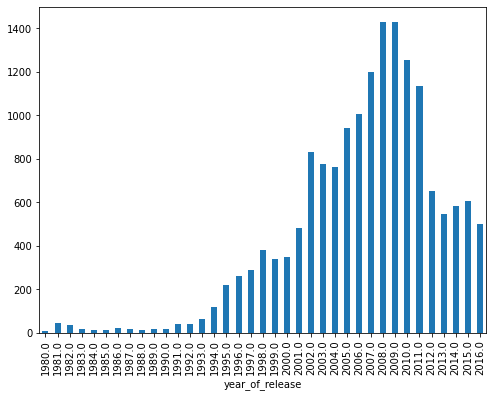

In [15]:
#grafico de barras de la cantidad de juegos lanzados en diferentes años

games.groupby('year_of_release').size().plot(kind= 'bar', figsize = [8, 6])
plt.show()

Los datos de los periodos son significativos debido a que estos puede ayudarnos a pronosticar para el siguiente año.

## Plataformas con mayores ventas

In [16]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [17]:
#Plataformas con mayores ventas en orden descendente

games_platf=games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False).head(6)
games_platf

,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12
15,PS,730.86


In [18]:
#Las 6 plataformas lideres en venta

games_platf_famous = list(games_platf['platform'])
games_platf_famous

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

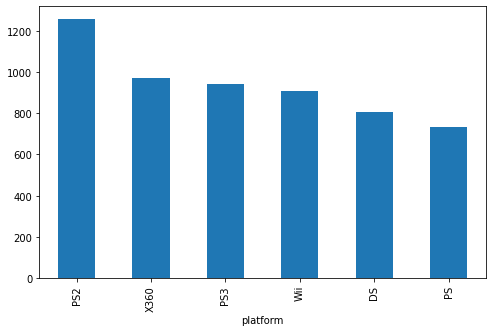

In [19]:
#grafico de barras de las plataformas con mayores ventas

games_platf.plot(kind = 'bar', x = 'platform', y = 'total_sales', legend = False, figsize = [8,5])
plt.show()

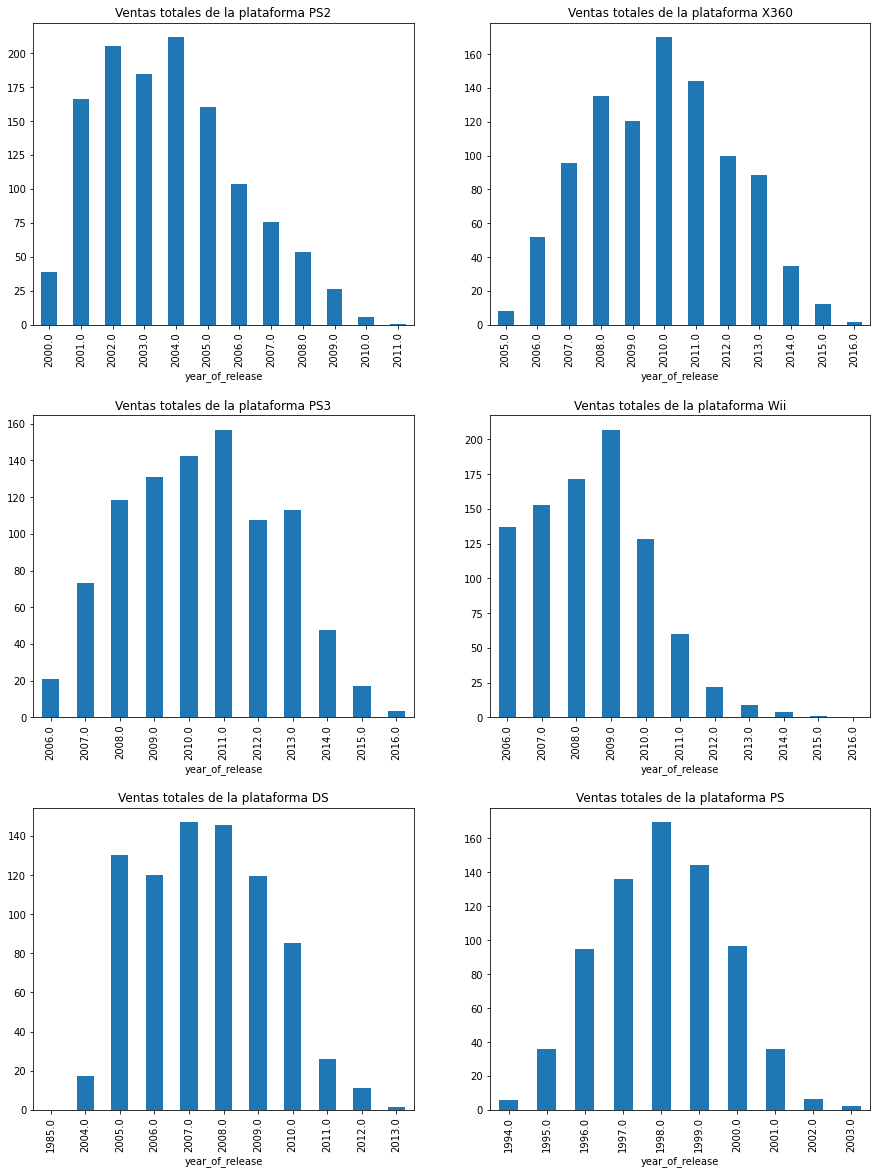

In [20]:
#Se realiza un grafico de barras para la venta total para cada plataforma

fig, ax = plt.subplots(ncols=2, nrows=3, figsize= [15,20]) #varias graficas

for i, platform in enumerate(games_platf_famous):
    
    fam = games.query('platform in @platform')
    
    ax.flatten()[i].set_title(f'Ventas totales de la plataforma {platform}') #unidimesional
    
    #display(fam)
    fam.groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', ax = ax.flatten()[i])
    
    fig.subplots_adjust(hspace=0.3)
    

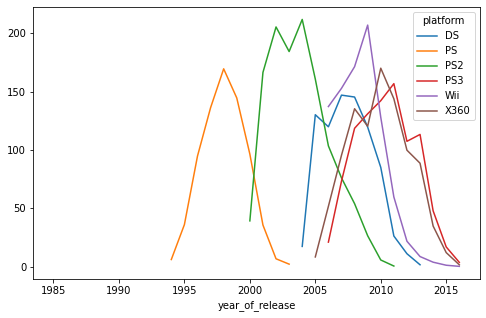

In [21]:
games.query('platform in @games_platf_famous').pivot_table(index = 'year_of_release', columns = 'platform', 
                                                           values= 'total_sales', aggfunc = 'sum').plot(figsize = [8, 5])
plt.show()

De acuerdo a la gráfica, se observa que en los años 95's, aparecia una nueva plataforma en 5 años, como es el caso de la PS y PS2, mientras que sale su nueva versión decae la anterior; sin embargo mientras se avanza en el tiempo, se aprecia que las demas plataformas aparecieron casi simultaneamente en el 2005 y su caída 8 años después. Se trabajará con plataformas y videojuegos que aún no han sido descontinuados para un mejor análisis y predicción.

Se trabajara con datos desde el año 2012.

## Diagrama de caja

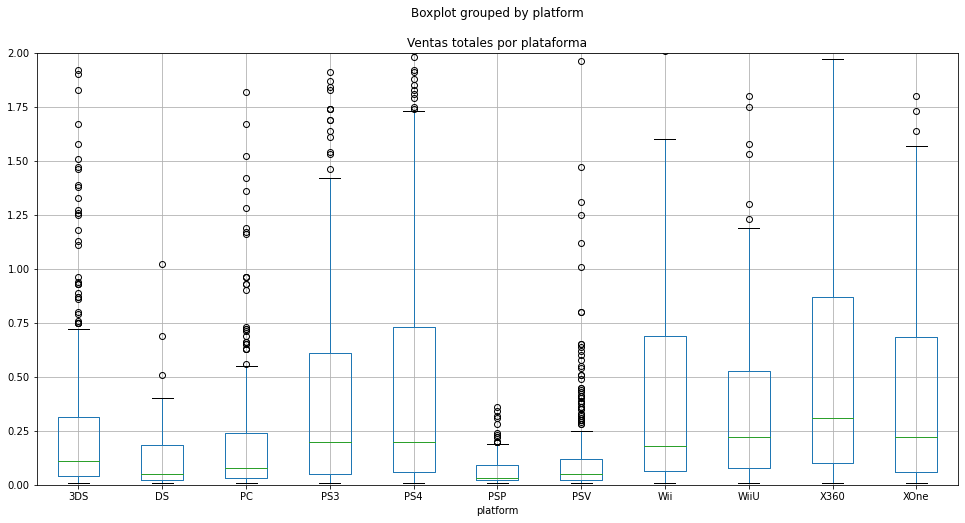

In [22]:
#Se realiza diagrama de caja con respecto a las ventas totales de acuerdo a plataforma filtrado desde el año 2012

games[games['year_of_release']>=2012].boxplot(column = 'total_sales', by = 'platform', figsize = [16, 8])
plt.ylim(0, 2)
plt.title('Ventas totales por plataforma')
plt.show()

Las diferencias en ventas son ligeramente significativas esto podria deberse a la popularidad de ciertas plataformas y también a la reseña o critica de usuarios y profesionales, por otro lado también por la nueva generacion de una plataforma y sus antigua generación ya no es muy solicitada.

In [23]:
#Se muestra en promedio de ventas por plataforma

games[games['year_of_release']>=2012].groupby('platform')['total_sales'].mean().reset_index().sort_values(by = 'total_sales',
                                                                                                         ascending = False)

,platform,total_sales
9,X360,0.810068
4,PS4,0.801378
7,Wii,0.655000
10,XOne,0.645020
3,PS3,0.585781
8,WiiU,0.559116
0,3DS,0.491439
1,DS,0.404839
2,PC,0.250600
6,PSV,0.119659


## Correlación

Se elegira a continuación la PS3, para hallar la correlación entre las ventas y la critica de usuarios y profesionales.

In [24]:
#Se filtra para seleccionar la plataforma PS3

platf_ps3 = games[(games['year_of_release'] >= 2012) & (games['platform'] == 'PS3')]
platf_ps3

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
69,Call of Duty: Ghosts,PS3,2013.0,Shooter,4.10,3.63,0.38,1.25,71.0,2.6,M,9.36
81,FIFA Soccer 13,PS3,2012.0,Action,1.06,5.01,0.13,1.97,88.0,6.6,E,8.17
126,FIFA 14,PS3,2013.0,Sports,0.78,4.24,0.07,1.37,86.0,4.3,E,6.46
...,...,...,...,...,...,...,...,...,...,...,...,...
16628,Akatsuki no Goei Trinity,PS3,2012.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16638,Tour de France 2014,PS3,2014.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,E,0.01
16674,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16691,Dynasty Warriors: Eiketsuden,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


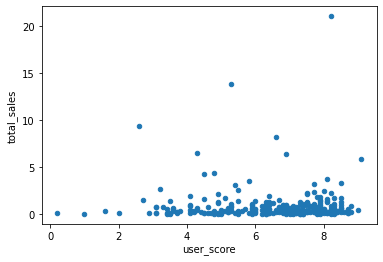

In [25]:
#Diagrama de dispersión entre puntuacion de usuarios y ventas totales

platf_ps3.plot(kind = 'scatter', x = 'user_score', y = 'total_sales')
plt.show()

In [26]:
platf_ps3['user_score'].corr(platf_ps3['total_sales'])

-0.005143522887113815

La correlación es de -0.005, esto quiere decir que el 0.5% presenta una correlación negativa muy debil.

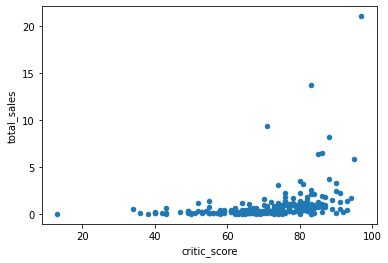

In [27]:
platf_ps3.plot(kind = 'scatter', x = 'critic_score', y = 'total_sales')
plt.show()

In [28]:
platf_ps3['critic_score'].corr(platf_ps3['total_sales'])

0.3314972592629587

La correlación es de 0.33, esto quiere decir que el 33.1% de las ventas se puede explicar con la critica de profesionales. Presenta una correlacion moderada.

Al parecer la tercera parte de los usuarios para esta plataforma se guian de la critica experta.

## Juego por plataforma

In [29]:
#Utilizamos datos desde 2012 hacia delante

games_new = games[games['year_of_release']>=2012]
games_new.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


In [30]:
#Se crea una lista de los juegos que se encuentra en mas de una plataforma

cross_platf_games = list(games_new.groupby("name")["platform"].nunique().reset_index().query("platform > 1")["name"])
cross_platf_games

[" Frozen: Olaf's Quest",
 '2014 FIFA World Cup Brazil',
 '3rd Super Robot Wars Z Jigoku Hen',
 '3rd Super Robot Wars Z: Tengoku-Hen',
 '7 Days to Die',
 'AKB1/149: Love Election',
 'Abunai: Koi no Sousa Shitsu',
 'Accel World: Ginyoku no Kakusei',
 'Accel World: Kasoku no Chouten',
 "Adventure Time: Explore the Dungeon Because I Don't Know!",
 'Adventure Time: Finn & Jake Investigations',
 'Adventure Time: The Secret of the Nameless ',
 'Adventure Time: The Secret of the Nameless Kingdom',
 'Aegis of Earth: Protonovus Assault',
 "Agatha Christie's The ABC Murders",
 'Akatsuki no Goei Trinity',
 "Akiba's Trip: Undead & Undressed",
 'Alien: Isolation',
 'Aliens: Colonial Marines',
 'All Kamen Rider: Rider Generation 2',
 'Amnesia Later',
 'Anarchy Reigns',
 'Angry Birds Star Wars',
 'Angry Birds Trilogy',
 'Ar Nosurge: Ode to an Unborn Star',
 'Armored Core V',
 "Army of Two: The Devil's Cartel",
 'Arslan: The Warriors of Legend',
 "Assassin's Creed Chronicles",
 "Assassin's Creed III",

In [31]:
#Agrupamamos por nombre, plataforma y ademas que se encuentre en la lista creada 'cross_platf_games'

df_games=games_new.groupby(['name', 'platform'])['total_sales'].sum().reset_index().sort_values(by = 'total_sales',
                                                                                                ascending= False).query('name in @cross_platf_games')
df_games1=df_games[df_games['total_sales']>9]
df_games1

,name,platform,total_sales
950,Grand Theft Auto V,PS3,21.05
952,Grand Theft Auto V,X360,16.27
320,Call of Duty: Black Ops 3,PS4,14.63
324,Call of Duty: Black Ops II,PS3,13.79
326,Call of Duty: Black Ops II,X360,13.68
951,Grand Theft Auto V,PS4,12.62
331,Call of Duty: Ghosts,X360,10.24
328,Call of Duty: Ghosts,PS3,9.36
1510,Minecraft,X360,9.18


In [32]:
#varianza

df_games.groupby('name')['total_sales'].var().reset_index().head(6)

,name,total_sales
0,Frozen: Olaf's Quest,0.003200
1,2014 FIFA World Cup Brazil,0.016200
2,3rd Super Robot Wars Z Jigoku Hen,0.000800
3,3rd Super Robot Wars Z: Tengoku-Hen,0.000800
4,7 Days to Die,0.004050
5,AKB1/149: Love Election,0.008033


In [33]:
#desviación estándar

df_games.groupby('name')['total_sales'].std().reset_index().head(6)

,name,total_sales
0,Frozen: Olaf's Quest,0.056569
1,2014 FIFA World Cup Brazil,0.127279
2,3rd Super Robot Wars Z Jigoku Hen,0.028284
3,3rd Super Robot Wars Z: Tengoku-Hen,0.028284
4,7 Days to Die,0.063640
5,AKB1/149: Love Election,0.089629


In [34]:
#Se contruye un DF

df_games_grap=df_games1.pivot(index = 'name', columns = 'platform', values = 'total_sales')
df_games_grap

platform,PS3,PS4,X360
name,,,
Call of Duty: Black Ops 3,NaN,14.63,NaN
Call of Duty: Black Ops II,13.79,NaN,13.68
Call of Duty: Ghosts,9.36,NaN,10.24
Grand Theft Auto V,21.05,12.62,16.27
Minecraft,NaN,NaN,9.18


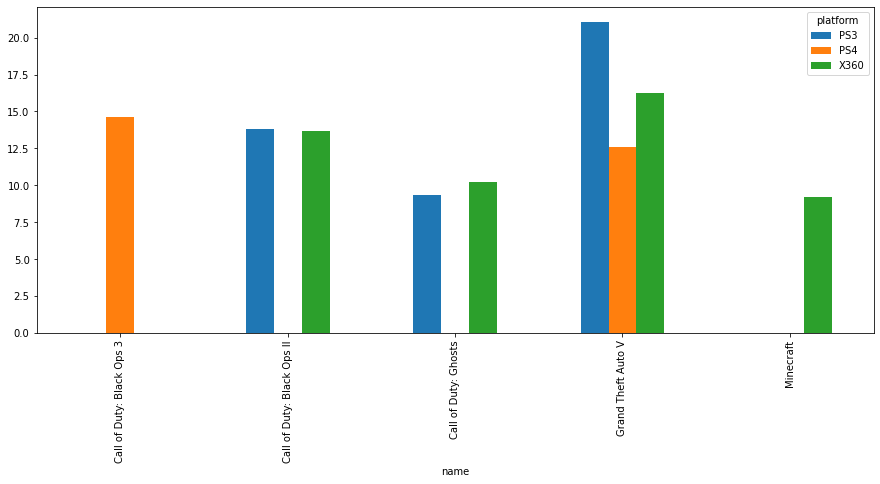

In [35]:
#grafico de barras que compara las ventas respecto a la plataforma utilizada

df_games_grap.plot(kind='bar', figsize = [15, 6])
plt.show()

Se observa que la venta varía en algunos juegos de acuerdo a la plataforma, se colocó desde 9m las ventas por plataforma para no saturar la grafica.

## Género del juego

In [36]:
#agrupados por género las ventas

games_genre=games_new.groupby('genre')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', ascending = False).head(6)
games_genre

,genre,total_sales
0,Action,441.12
8,Shooter,304.73
7,Role-Playing,192.80
10,Sports,181.07
3,Misc,85.04
4,Platform,61.00


In [37]:
#lista de los generos mas vendidos

games_genre_famous = list(games_genre['genre'])
games_genre_famous

['Action', 'Shooter', 'Role-Playing', 'Sports', 'Misc', 'Platform']

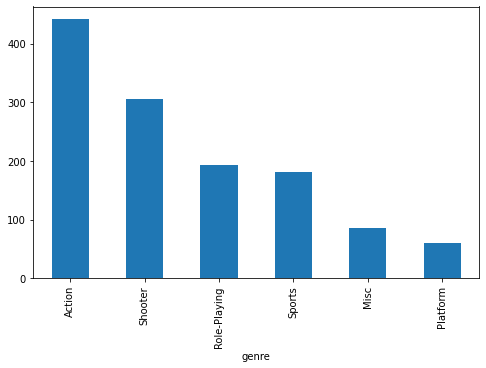

In [38]:
#grafico de barras de las plataformas mas vendidas

games_genre.plot(kind = 'bar', x = 'genre', y = 'total_sales', legend = False, figsize = [8,5])
plt.show()

Los géneros de los juegos mas rentable al parecer son los que les brinda una mayor emoción como acción, carreras, deporte, entre otros. A los usuarios les gusta sentir la adrenalina.

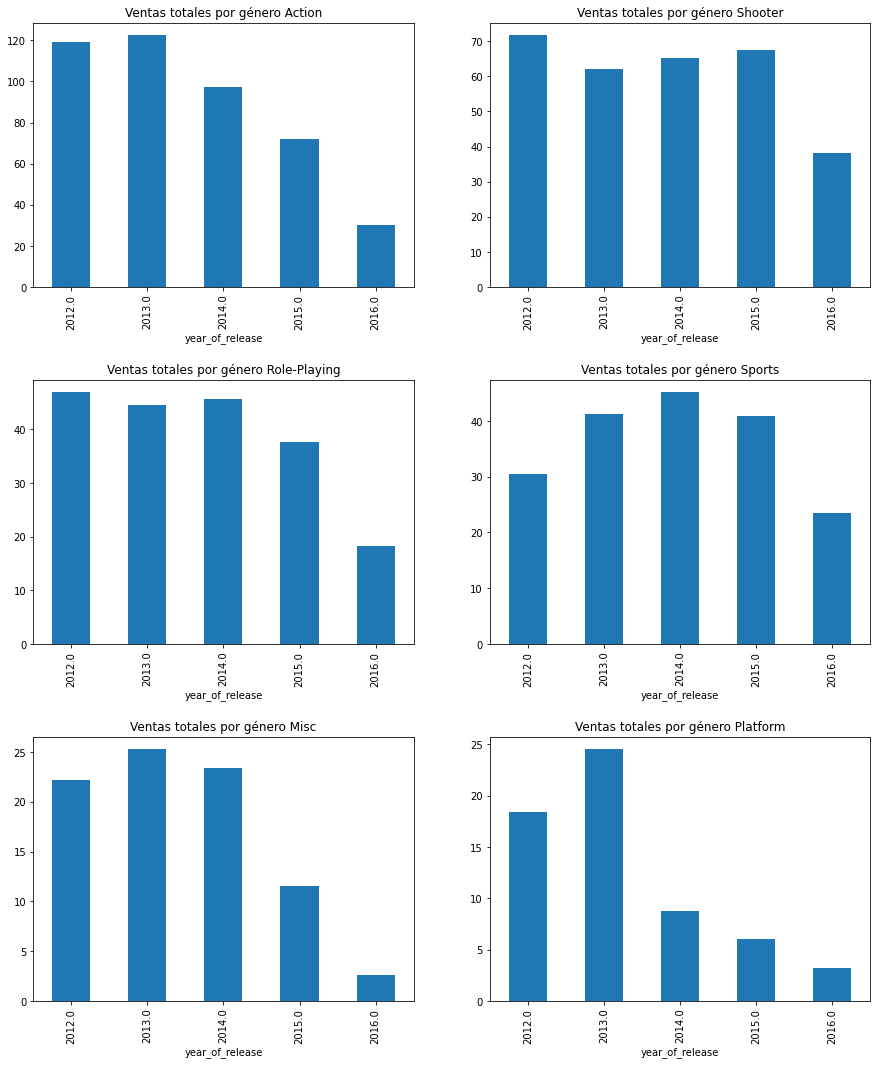

In [39]:
#Se realiza un grafico de barras para la venta total para los generos mas populares

fig, ax = plt.subplots(ncols=2, nrows=3, figsize= [15, 18])

for i, genre in enumerate(games_genre_famous):
    
    gen = games_new.query('genre in @genre')
    
    ax.flatten()[i].set_title(f'Ventas totales por género {genre}') #unidimesional
    
    gen.groupby('year_of_release')['total_sales'].sum().plot(kind = 'bar', ax = ax.flatten()[i])
    
    fig.subplots_adjust(hspace=0.35)


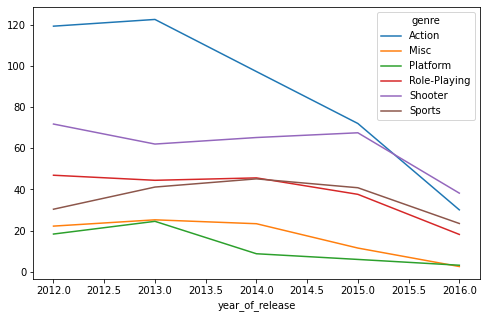

In [40]:
games_new.query('genre in @games_genre_famous').pivot_table(index = 'year_of_release', columns = 'genre', 
                                                           values= 'total_sales', aggfunc = 'sum').plot(figsize = [8, 5])
plt.show()

Se observa que empezó ha haber una caída para los géneros en este año (2016).

# Perfil de usuario por región

## Plataformas principales

,platform,na_sales,market_share
0,X360,140.05,0.236983
1,PS4,108.74,0.184003
2,PS3,103.38,0.174933
3,XOne,93.12,0.157571
4,3DS,55.31,0.093592


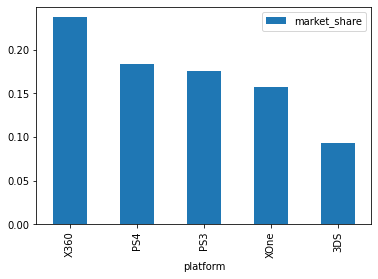

,platform,eu_sales,market_share
0,PS4,141.09,0.278383
1,PS3,106.86,0.210844
2,X360,74.52,0.147034
3,XOne,51.59,0.101792
4,3DS,42.64,0.084132


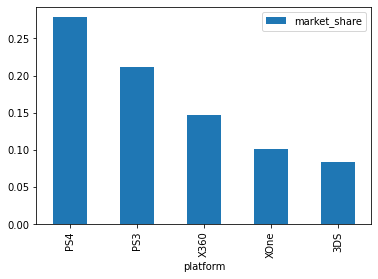

,platform,jp_sales,market_share
0,3DS,87.79,0.455862
1,PS3,35.29,0.183249
2,PSV,21.04,0.109253
3,PS4,15.96,0.082875
4,WiiU,13.01,0.067556


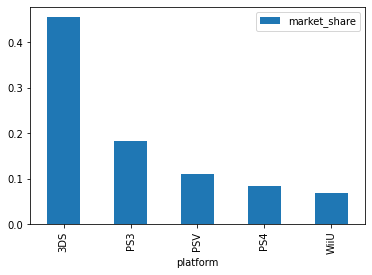

In [41]:
#Organizamos plataformas populares usadas por region

regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    #agrupado por plataforma
    sale_platf = games_new.groupby('platform')[region].sum().sort_values(ascending = False).reset_index() 
    sale_platf['market_share'] = sale_platf[region]/sale_platf[region].sum() #porcentaje del mercado
    
    sale_platf_fam = sale_platf.head(5) #top 5
    display(sale_platf_fam)
    
    sale_platf_fam.plot(x = 'platform', y = 'market_share', kind = 'bar')
    plt.show()
    

Las variaciones de la cuotas de mercado entre regiones varia entre el 4% y 18% entre las primeras posiciones con diferentes plataformas en las regiones. Por otra parte, se observa que en las 3 regiones la *PS3* se mantiene con un aproximado de 19% de posició en el mercado.

## Géneros principales

,genre,na_sales
0,Action,177.84
1,Shooter,144.77
2,Sports,81.53
3,Role-Playing,64.00
4,Misc,38.19


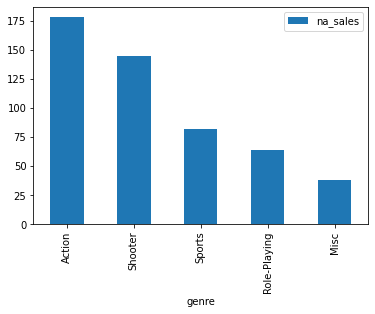

,genre,eu_sales
0,Action,159.34
1,Shooter,113.47
2,Sports,69.09
3,Role-Playing,48.53
4,Racing,27.29


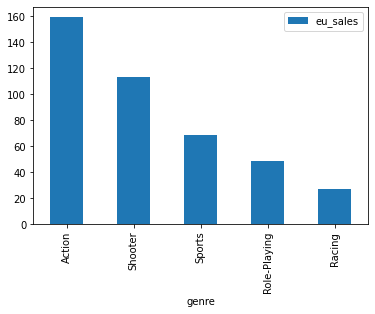

,genre,jp_sales
0,Role-Playing,65.44
1,Action,52.80
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44


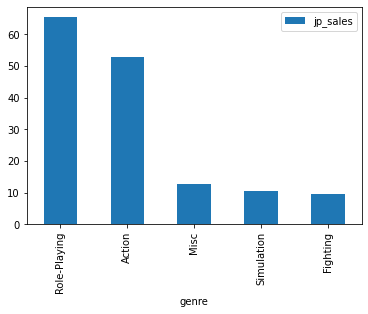

In [42]:
#Organizamos géneros populares por region

regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    sale_genr = games_new.groupby('genre')[region].sum().sort_values(ascending = False).reset_index()
    
    sale_genr_fam = sale_genr.head(5)
    display(sale_genr_fam)
    
    sale_genr_fam.plot(x = 'genre', kind = 'bar')
    plt.show()
    

En Norteamenica y Europa se prefieren los juegos de acción, deporte y disparo. Mientras que en Japón se prefiere juego de roles en primer lugar, seguido por accion, misceláneas y simulaciones. 


## Clasificaciones (Rating)

,rating,na_sales
0,M,231.57
1,E,114.37
2,E10+,75.70
3,T,66.02


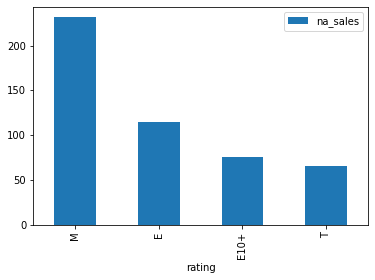

,rating,eu_sales
0,M,193.96
1,E,113.03
2,E10+,55.37
3,T,52.96


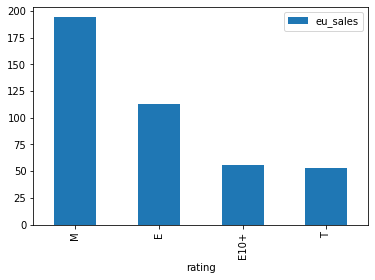

,rating,jp_sales
0,E,28.33
1,T,26.02
2,M,21.20
3,E10+,8.19


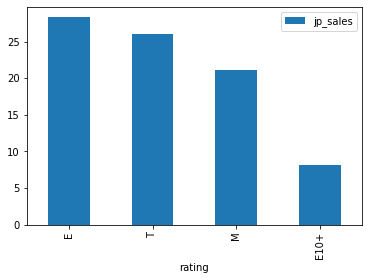

In [43]:
#Organizamos por clasificacion ESRB por region

regions = ['na_sales', 'eu_sales', 'jp_sales']

for region in regions:
    sale_rat = games_new.groupby('rating')[region].sum().sort_values(ascending = False).reset_index()
    
    sale_rat_fam = sale_rat.head()
    display(sale_rat_fam)
    
    sale_rat_fam.plot(x = 'rating', y = region, kind = 'bar')
    plt.show()

Aunque las calificaciones ESRB afecten de cierta manera a las ventas por región, también tiene que ver el hecho de que usuarios no respeten la misma para el cual afectaria otros factores como cultura entre otros. Por otra parte en Japon se observa que en su mayoria es adquirida E, la que se para Adultos y niños.

# Prueba de hipótesis

**Se utilizará la Hipotesis sobre la igualdad de las medias de dos poblaciones, debido a que estas vendran de diferentes tipo de usuarios que eligen su plataforma.**

A continuación se propondra una hipotesis que se rechazará o no, esta en referencia a si las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.

**H0 = Las calificaciones promedio de los usuarios para las plataformas XBOX ONE y PC son iguales**

**H1 = Las calificaciones promedio de los usuarios para las plataformas XBOX ONE y PC NO son iguales**

In [44]:
games_new['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

In [45]:
#filtramos por plataforma XOne

games_new_xboxone = games_new[games_new['platform']=='XOne']['user_score'].dropna()

#Filtramos por plataforma PC

games_new_pc = games_new[games_new['platform']=='PC']['user_score'].dropna()


In [46]:
games_new_xboxone

165      7.9
179      5.4
242      6.4
270      6.2
373      4.1
        ... 
16544    6.8
16597    6.0
16630    8.2
16643    6.6
16660    6.7
Name: user_score, Length: 182, dtype: float64

In [47]:
#Hipotesis sobre la igualdad de las medias 
#de dos poblaciones

alpha = 0.05 #nivel de significancia
results = st.ttest_ind(games_new_xboxone, games_new_pc)
valorp = results.pvalue
print(valorp)

#condicional para comparar el p con el alpha
if valorp<alpha:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

0.5535080500643661
No se rechaza la hipotesis nula


No existe suficiente evidencia, con los datos presentes, para rechazar la hipotesis nula.

**Se utilizará la Hipotesis sobre la igualdad de las medias de dos poblaciones, debido a que estas vendran de diferentes tipo de usuarios que eligen el genero de juego.**

A continuación se propondra una hipotesis que se rechazará o no, esta en referencia a si las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.

**H0 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son iguales**

**H1 = Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes NO son iguales**

In [48]:
games_new['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

In [49]:
#filtramos por genero Acción

games_new_action = games_new[games_new['genre']=='Action']['user_score'].dropna()

#Filtramos por género Deporte

games_new_sports = games_new[games_new['genre']=='Sports']['user_score'].dropna()


In [50]:
#Hipotesis sobre la igualdad de las medias 
#de dos poblaciones

alpha = 0.05 #nivel de significancia
results = st.ttest_ind(games_new_action, games_new_sports)
valorp = results.pvalue
print(valorp)

#condicional para comparar el p con el alpha
if valorp<alpha:
    print('Se rechaza la hipotesis nula')
else:
    print('No se rechaza la hipotesis nula')

3.7163089460934874e-26
Se rechaza la hipotesis nula


Al caer en la zona crítica se rechaza la hipotesis nula, es decir que es muy poco probable que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes sean iguales, al menos con los datos que tenemos.

# Conclusiones

1. Los usuarios de distintas regiones tienen diferente comportamiento en la elección de su género favorito como puede apreciarse en las ventas totales por región, usuario de norteamérica y europa tienden en un gran porcentaje a adquirir videojuegos que conlleva adrenalina como lo es el género acción, disparos y deporte; por otra parte, los japoneses tiene una preferencia a los roles de juego seguido por los generos descritos anteriormente como accion y miscelánia. La cual puede deberse a la cultura adquirida entre otros factores.

2. Para un análisis posterior como una predicción se consideró evaluar los datos desde 2012. 

3. Las plataformas mas utilizadas varia por región, liderando en Norteamérica X360, en Europa PS4 y en Japón el 3DS. En las tres regiones se tiene que PS3 tiene una posición de aproximadamente el 20% del mercado.

4. La clasificación en Norteamérica y Europa es de M (consultiva o +15), mientras que en Japón lidera E (apto adultos y niños).

5. No se rechazó la hipótesis nula de que las calificaciones por usuarios en la plataforma XBOXONE y PC sean iguales, debido a que no existe suficiente evidencia con los datos presentes.

6. Se rechazó la hipotesis nula de que las calificaciones promedio de los usuarios para los géneros de Acción y Deportes sean iguales, con los datos que tenemos es poco probable que lo sean.